# GITHUB LINK:
    
> https://github.com/ARBINDA765/EDA

> Code-:EDA - Gun Incidents in USA 
    
> Data-:all_incidents.csv'
#github #python #dataanalysis

In [1]:
#Aim
#Explore & Compare gun incidents by years, states

In [2]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import median
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns=999
pd.options.display.float_format='{:,.2f}'.format 
pd.plotting.register_matplotlib_converters()
import plotly.express as px


In [3]:
#Loading the data
df=pd.read_csv('all_incidents.csv',parse_dates=['date'])

In [4]:
#Checking the data frame
df.head()

incident_id       date           state         city  \
0      2314858 2022-05-28        Arkansas  Little Rock   
1      2314409 2022-05-28        Colorado       Denver   
2      2314498 2022-05-28        Missouri  Saint Louis   
3      2314485 2022-05-28  South Carolina     Florence   
4      2314483 2022-05-28      California   Carmichael   

                         address  n_killed  n_injured  
0       W 9th St and Broadway St         0          1  
1          3300 block of Clay St         0          1  
2  Page Blvd and Vandeventer Ave         0          1  
3                   Old River Rd         0          2  
4    4400 block of Manzanita Ave         1          0

In [5]:
#Checking the shape
print("Total shape of the dataframe =",df.shape)

Total shape of the dataframe = (472820, 7)


In [6]:
#Overall of information of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472820 entries, 0 to 472819
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   incident_id  472820 non-null  int64         
 1   date         472820 non-null  datetime64[ns]
 2   state        472820 non-null  object        
 3   city         472820 non-null  object        
 4   address      449089 non-null  object        
 5   n_killed     472820 non-null  int64         
 6   n_injured    472820 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 25.3+ MB


In [7]:
#Data cleaning
missing_values=df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values.sum()
print(total_missing)

23731


In [8]:
percent_missing = round((total_missing/total_cells) * 100, 2)
print("Missing percentage is ",percent_missing*100 ,'%')

Missing percentage is  72.0 %


In [9]:
#Checking the duplicated
df.duplicated().value_counts()
#Dropping the duplicated 
df.drop_duplicates(inplace=True)
    

In [10]:
#Checking the duplicate again after deleting 
df.duplicated().value_counts()

False    471986
dtype: int64

In [11]:
#Checking the shape
df.shape

(471986, 7)

# Exploring

In [12]:
#Adding the injured & killed
df['total'] = df['n_killed'] + df['n_injured']

In [13]:
#Checking the dataframe after adding columns
df.columns

Index(['incident_id', 'date', 'state', 'city', 'address', 'n_killed',
       'n_injured', 'total'],
      dtype='object')

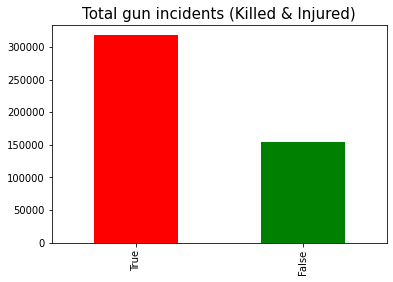

In [14]:
total_over_0 = df['total'] != 0

total_over_0.value_counts().plot(kind='bar',color=['red','green'])

plt.title("Total gun incidents (Killed & Injured)", size=15)

plt.show()

Check the total number of gun incidents in this dataset.

Total - 471986
Gun incidents - 318047
No incidents - 121736

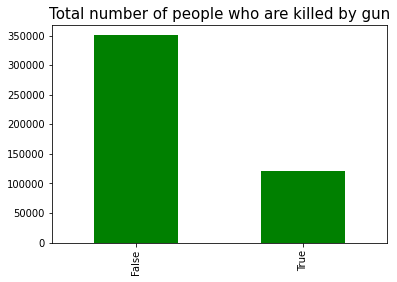

In [15]:
#Total number of people who are killed by gun
killed = df['n_killed'] != 0
killed.value_counts().plot(kind='bar', color='green')

plt.title("Total number of people who are killed by gun", size=15)

plt.show()

In [16]:
killed=killed.value_counts().reset_index()
killed

#reset_index().rename(columns={0:'Count'}).sort_values(by='Count',axis=0,ascending=False)

index  n_killed
0  False    350250
1   True    121736

In [17]:
px.bar(killed,x="index",y="n_killed",color='index',template='simple_white',hover_data=killed.columns,color_discrete_sequence=['blue','red'],width=500,height=500)

<IPython.core.display.Javascript object>

In [18]:
#Explore & Compare gun incidents by years, states
df.head()

incident_id       date           state         city  \
0      2314858 2022-05-28        Arkansas  Little Rock   
1      2314409 2022-05-28        Colorado       Denver   
2      2314498 2022-05-28        Missouri  Saint Louis   
3      2314485 2022-05-28  South Carolina     Florence   
4      2314483 2022-05-28      California   Carmichael   

                         address  n_killed  n_injured  total  
0       W 9th St and Broadway St         0          1      1  
1          3300 block of Clay St         0          1      1  
2  Page Blvd and Vandeventer Ave         0          1      1  
3                   Old River Rd         0          2      2  
4    4400 block of Manzanita Ave         1          0      1

In [19]:
#Total no of of people killed by city & state
df[['state', 'city', 'n_killed']] [(df['date'].dt.year == 2022) & (df['n_killed']!=0)].groupby(['state','city']).sum('n_killed').sort_values(by='n_killed',axis=0,ascending=False)

n_killed
state        city                         
Texas        Houston                   222
Illinois     Chicago                   219
Pennsylvania Philadelphia              202
Maryland     Baltimore                 116
Louisiana    New Orleans               108
...                                    ...
New Jersey   Plainfield                  1
             Perth Amboy                 1
             Pennsauken Township         1
Florida      Lake Worth                  1
Mississippi  Greenwood                   1

[2148 rows x 1 columns]

In [20]:
#Total no of of people killed by city
State_killed=df[['state','n_killed']] [(df['date'].dt.year == 2022) & (df['n_killed']!=0)].groupby(['state']).sum('n_killed').sort_values(by='n_killed',axis=0,ascending=False)

In [41]:
State_killed.head()
#=State_killed.reset_index()

n_killed
state                 
Texas              841
California         661
Florida            435
Pennsylvania       379
Georgia            359

In [22]:
State_killed=State_killed.sort_values(by='n_killed',ascending=False,axis=0)

In [42]:
State_killed.head()

n_killed
state                 
Texas              841
California         661
Florida            435
Pennsylvania       379
Georgia            359

In [24]:
State_killed=State_killed[:5]

<AxesSubplot:title={'center':'TOP 5 STATES WHERE KILING ARE HAPPENING'}, xlabel='state'>

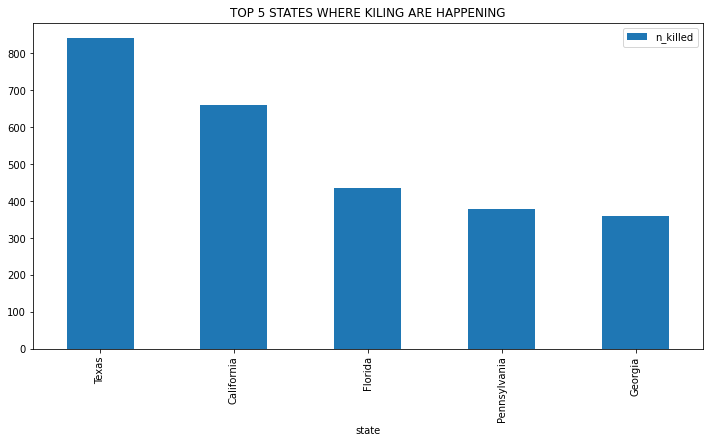

In [34]:
State_killed.plot( kind='bar',title="TOP 5 STATES WHERE KILING ARE HAPPENING",figsize=(12,6),)

In [ ]:
#Total no of of people killed by city in 2022
City_killed=df[['city', 'n_killed']] [(df['date'].dt.year == 2022) & (df['n_killed']!=0)].groupby(['city']).sum('n_killed')

In [155]:
#By the help of Plotly express
px.bar( State_killed,text_auto=True,color=State_killed.index,title="TOP 5 STATES WHERE KILING ARE HAPPENING",template="simple_white")

In [101]:
df['date_Year']=df['date'].dt.year

In [103]:
df.head()

incident_id       date           state         city  \
0      2314858 2022-05-28        Arkansas  Little Rock   
1      2314409 2022-05-28        Colorado       Denver   
2      2314498 2022-05-28        Missouri  Saint Louis   
3      2314485 2022-05-28  South Carolina     Florence   
4      2314483 2022-05-28      California   Carmichael   

                         address  n_killed  n_injured  total  date_Year  
0       W 9th St and Broadway St         0          1      1       2022  
1          3300 block of Clay St         0          1      1       2022  
2  Page Blvd and Vandeventer Ave         0          1      1       2022  
3                   Old River Rd         0          2      2       2022  
4    4400 block of Manzanita Ave         1          0      1       2022

In [120]:
#Which year highest killing happpend 
year_killed=df[['n_killed','date_Year','city','state']].groupby(['date_Year','city','state']).sum('n_killed')

In [121]:
year_killed=year_killed.sort_values(by='n_killed',ascending=False,axis=0)[:5]

In [126]:
year_killed=year_killed.reset_index()

In [141]:
year_killed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_Year  5 non-null      int64 
 1   city       5 non-null      object
 2   state      5 non-null      object
 3   n_killed   5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


<AxesSubplot:xlabel='date_Year'>

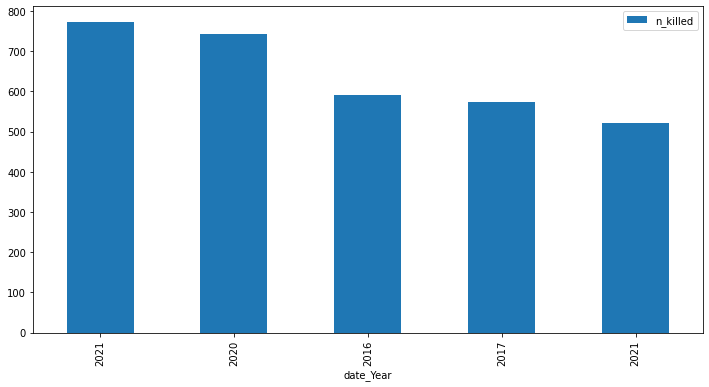

In [140]:
year_killed.plot(kind='bar',x='date_Year',figsize=(12,6))

In [156]:
year_killed

date_Year     city     state  n_killed
0       2021  Chicago  Illinois       773
1       2020  Chicago  Illinois       742
2       2016  Chicago  Illinois       591
3       2017  Chicago  Illinois       574
4       2021  Houston     Texas       522

In [153]:
#By the help of Plotly express
px.bar( year_killed,x='date_Year',y='n_killed',color='city',text='state',hover_data=year_killed.columns,title='TOP 5 STATES WHERE KILING ARE HAPPENING',template='simple_white',text_auto=True,)

In [157]:
#Obseravtion 
#Highest killing in 2021 and in the city of chicago
